<a href="https://colab.research.google.com/github/munnurumahesh03-coder/machine-learning-for-unsupervised-learning/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DBSCAN**

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
customer_df = pd.read_csv("Mall_Customers.csv")

In [ ]:
customer_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# **Data Cleaning and Preparation**

---



In [ ]:
# Print original column names
print("Original column names:")
print(customer_df.columns)

Original column names:
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [ ]:
# Rename the columns for easier access
customer_df.rename(columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'Spending_Score'
}, inplace=True)

In [ ]:
# Print new column names to confirm the change
print("\nNew column names:")
print(customer_df.columns)


New column names:
Index(['CustomerID', 'Gender', 'Age', 'Income', 'Spending_Score'], dtype='object')


In [ ]:
print("\nDataFrame with new column names:")
customer_df.head()


DataFrame with new column names:


,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **EDA & Visualization**

---



In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Income          200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
customer_df.describe()

,CustomerID,Age,Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0, 0.5, 'Spending Score (1-100)')

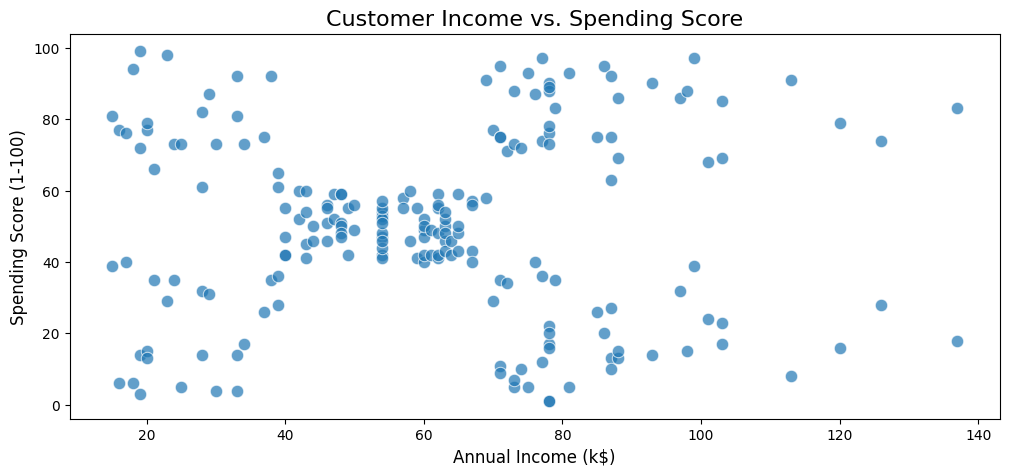

In [ ]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=customer_df, x='Income', y='Spending_Score', s=80, alpha=0.7)

plt.title('Customer Income vs. Spending Score', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)

Text(0.5, 1.0, 'Distribution of Age')

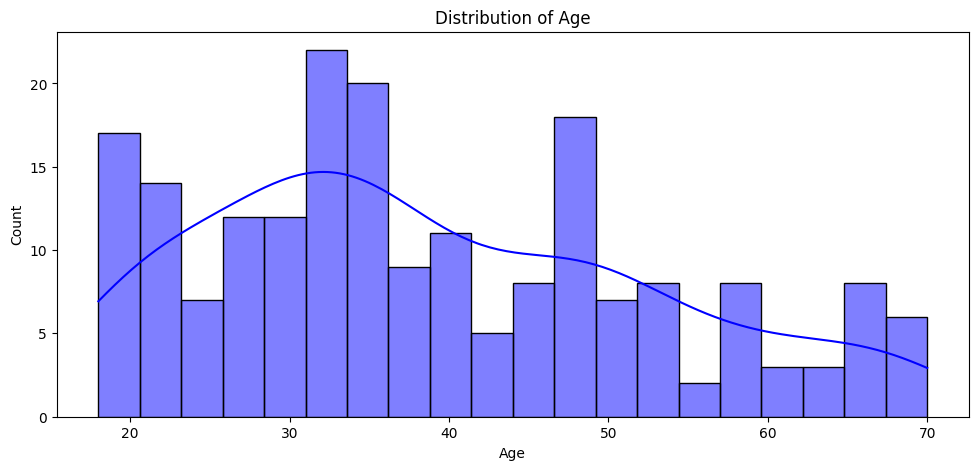

In [ ]:
plt.figure(figsize=(40, 5))
plt.subplot(1, 3, 1)
sns.histplot(customer_df['Age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Annual Income')

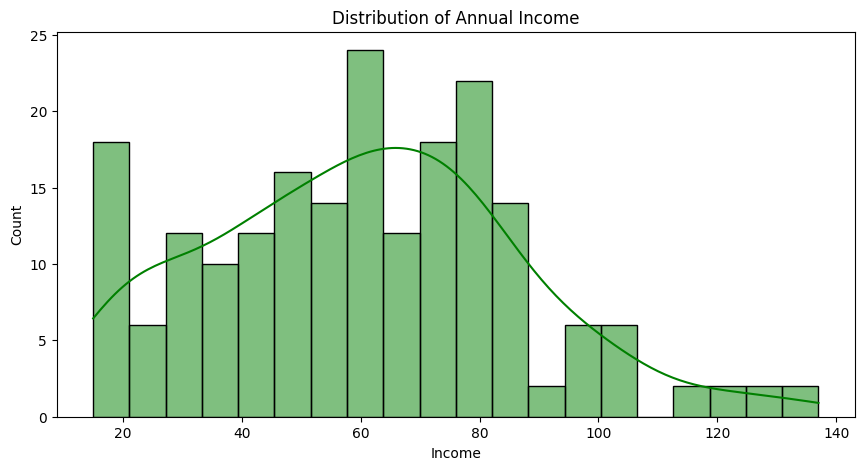

In [ ]:
plt.figure(figsize=(35, 5))
plt.subplot(1, 3, 2)
sns.histplot(customer_df['Income'], bins=20, kde=True, color='green')
plt.title('Distribution of Annual Income')

Text(0.5, 1.0, 'Distribution of Spending Score')

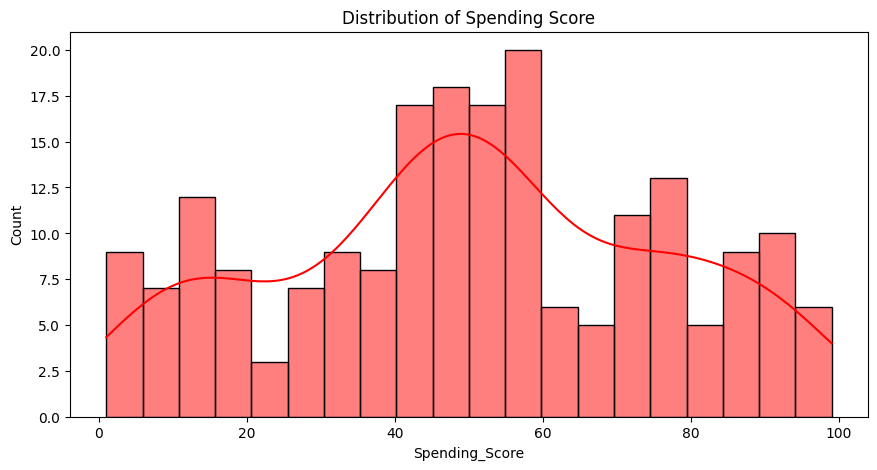

In [ ]:
plt.figure(figsize=(35, 5))
plt.subplot(1, 3, 3)
sns.histplot(customer_df['Spending_Score'], bins=20, kde=True, color='red')
plt.title('Distribution of Spending Score')

Text(0, 0.5, 'Count')

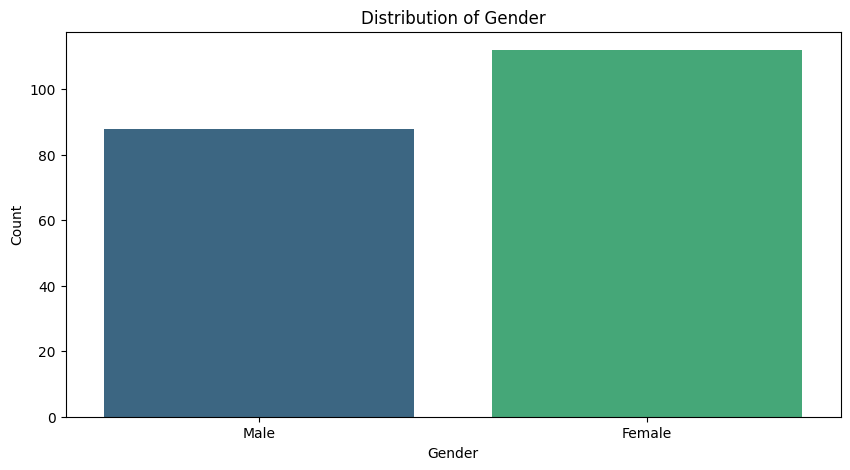

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=customer_df, x='Gender', palette='viridis')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')


--- Plotting All Pairwise Relationships ---


Text(0.5, 1.02, 'Pairwise Relationships of Numerical Features by Gender')

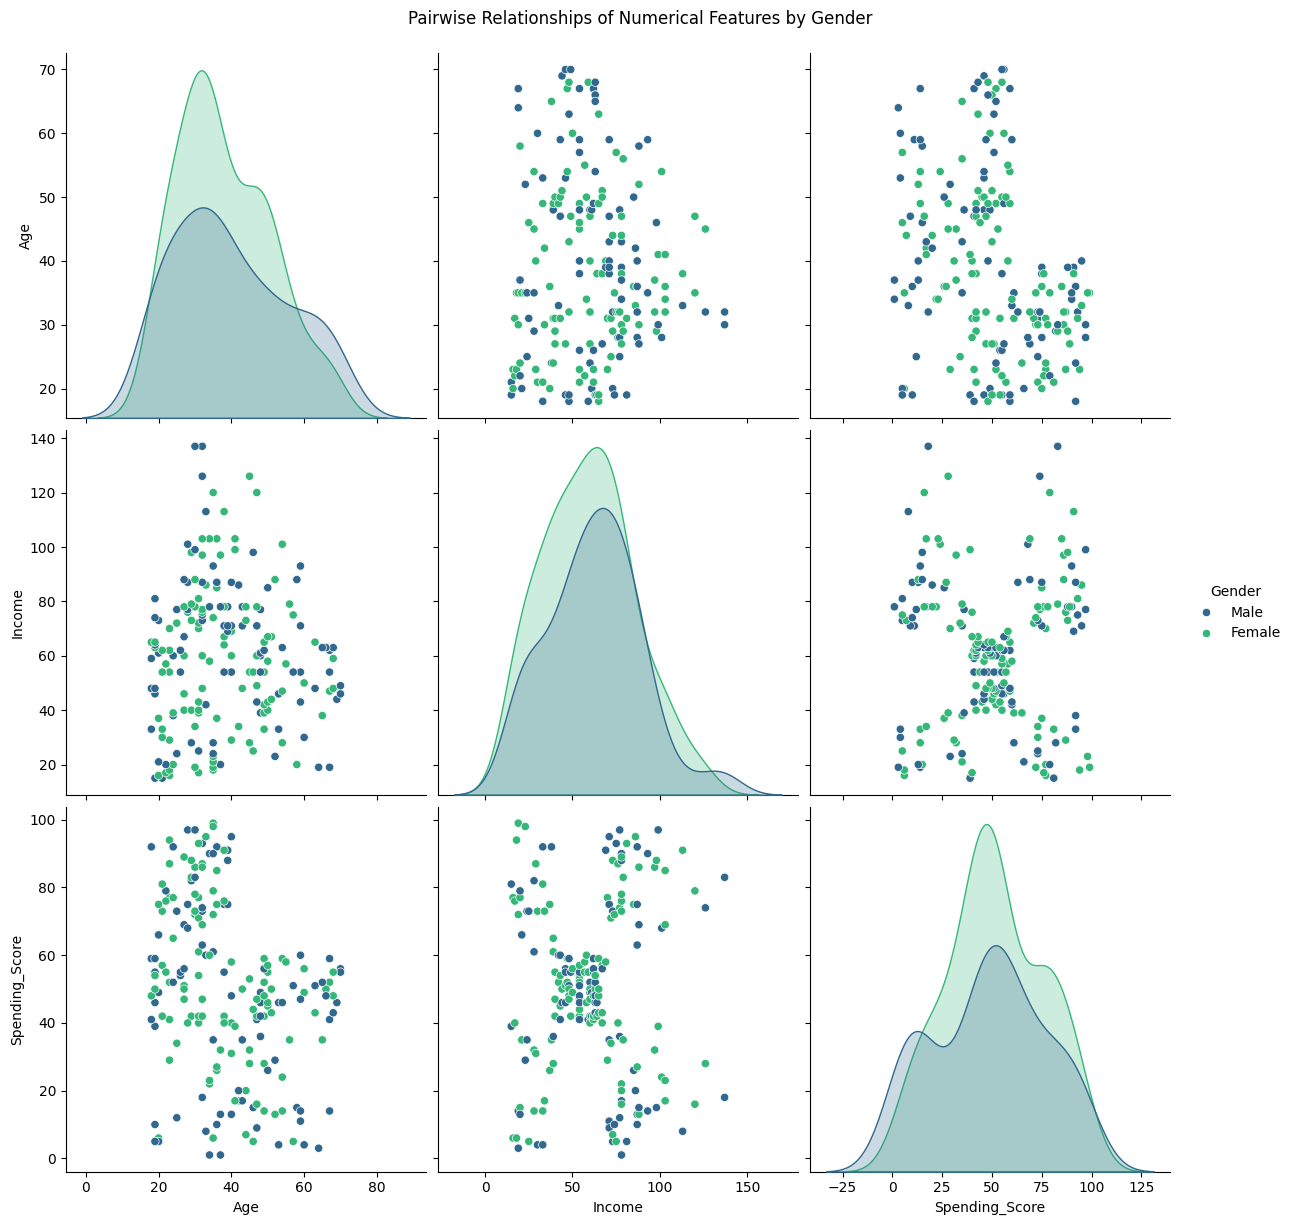

In [ ]:
print("\n--- Plotting All Pairwise Relationships ---")

# We'll add 'hue="Gender"' to see if gender plays a role in the clusters
pairplot_fig = sns.pairplot(customer_df, vars=['Age', 'Income', 'Spending_Score'], hue='Gender', palette='viridis', height=4)
pairplot_fig.fig.suptitle('Pairwise Relationships of Numerical Features by Gender', y=1.02) # y=1.02 raises title

In [ ]:
customer_df['Gender_Numerical'] = customer_df['Gender'].map({'Male': 0, 'Female': 1})

print("--- Converted 'Gender' to a new numerical column ---")
print(customer_df[['Gender', 'Gender_Numerical']].head())

--- Converted 'Gender' to a new numerical column ---
   Gender  Gender_Numerical
0    Male                 0
1    Male                 0
2  Female                 1
3  Female                 1
4  Female                 1


In [ ]:
customer_df.head()

,CustomerID,Gender,Age,Income,Spending_Score,Gender_Numerical
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


# **Feature Selection and Scaling**

---



In [ ]:
X = customer_df[['Gender_Numerical', 'Income', 'Spending_Score']]

print("\n--- Selected Features for Clustering ---")
print(X.head())


--- Selected Features for Clustering ---
   Gender_Numerical  Income  Spending_Score
0                 0      15              39
1                 0      15              81
2                 1      16               6
3                 1      16              77
4                 1      17              40


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# 1. Define which columns to scale and which to pass through

columns_to_scale = ['Income', 'Spending_Score']
columns_to_passthrough = ['Gender_Numerical']

# 2. Create the ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), columns_to_scale),
        ('passthrough', 'passthrough', columns_to_passthrough)
    ],
    remainder='drop' # This ensures no other columns accidentally get included
)

# 3. Apply the preprocessor to our data X
# We use .fit_transform() just like before, but on the preprocessor object.
X_scaled = preprocessor.fit_transform(X)

# 4. Inspect the result
# The output is a NumPy array. Let's look at the first 5 rows.
print("--- Correctly Scaled Feature Data (NumPy array, first 5 rows) ---")
print(X_scaled[:5])

# Note: The order of columns in the output array might be different.

scaled_feature_names = preprocessor.get_feature_names_out()

# Convert back to a DataFrame for clear inspection
X_scaled_df = pd.DataFrame(X_scaled, columns=scaled_feature_names)

print("\n--- Correctly Scaled Data as a DataFrame (first 5 rows) ---")
X_scaled_df

--- Correctly Scaled Feature Data (NumPy array, first 5 rows) ---
[[-1.73899919 -0.43480148  0.        ]
 [-1.73899919  1.19570407  0.        ]
 [-1.70082976 -1.71591298  1.        ]
 [-1.70082976  1.04041783  1.        ]
 [-1.66266033 -0.39597992  1.        ]]

--- Correctly Scaled Data as a DataFrame (first 5 rows) ---


,scaler__Income,scaler__Spending_Score,passthrough__Gender_Numerical
0,-1.738999,-0.434801,0.0
1,-1.738999,1.195704,0.0
2,-1.700830,-1.715913,1.0
3,-1.700830,1.040418,1.0
4,-1.662660,-0.395980,1.0
...,...,...,...
195,2.268791,1.118061,1.0
196,2.497807,-0.861839,1.0
197,2.497807,0.923953,0.0
198,2.917671,-1.250054,0.0


# **Determining Optimal DBSCAN Parameters**

---



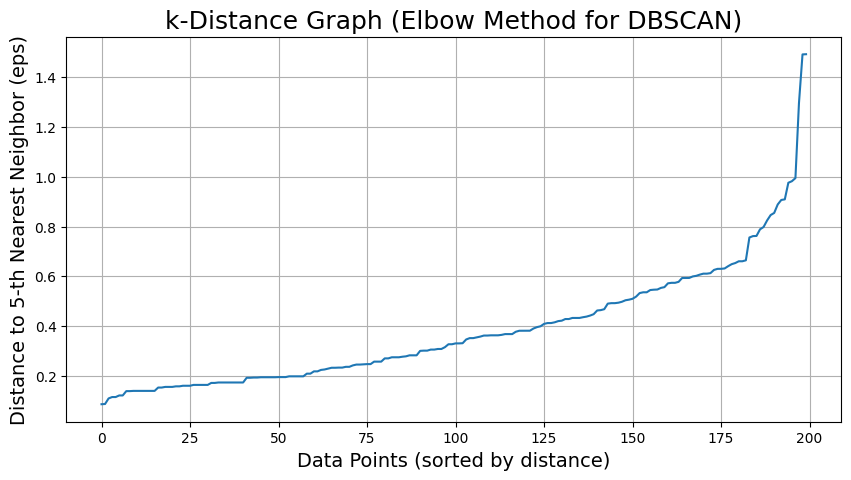

In [ ]:
from sklearn.neighbors import NearestNeighbors

# We chose min_samples = 5. We will find the distance to the 5th nearest neighbor for each point.
# The algorithm needs k = min_samples.
k = 5
nbrs = NearestNeighbors(n_neighbors=k).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# The distances object contains the distance to the k-th neighbor for each point.
# We are interested in the last column, which is the distance to the 5th neighbor.
k_distances = distances[:, k-1]

# Sort the distances in ascending order
k_distances_sorted = np.sort(k_distances)

# Plot the k-distance graph
plt.figure(figsize=(10, 5))
plt.plot(k_distances_sorted)
plt.title('k-Distance Graph (Elbow Method for DBSCAN)', fontsize=18)
plt.xlabel('Data Points (sorted by distance)', fontsize=14)
plt.ylabel(f'Distance to {k}-th Nearest Neighbor (eps)', fontsize=14)
plt.grid(True)

# **DBSCAN Model Training & Visualization**

---



--- Cluster Distribution (DBSCAN) ---
DBSCAN_Cluster
 1    107
 0     45
 4     16
-1     11
 3     11
 2      5
 5      5
Name: count, dtype: int64


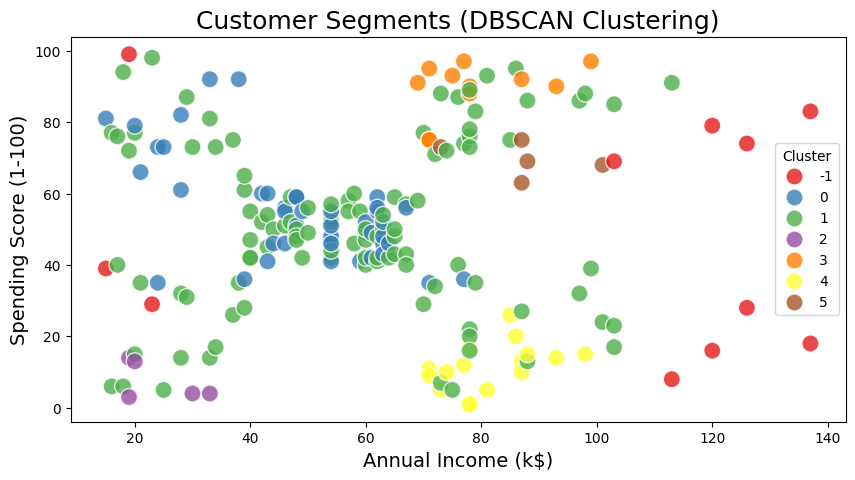

In [32]:
# 1. Model Training
# We import the DBSCAN class from scikit-learn
from sklearn.cluster import DBSCAN

# We create an instance of the model using our chosen hyperparameters.

dbscan_model = DBSCAN(eps=0.6, min_samples=5)

# We use .fit_predict() to train the model and get the cluster labels.
cluster_labels = dbscan_model.fit_predict(X_scaled)

# 2. Add the Cluster Labels back to our original DataFrame

customer_df['DBSCAN_Cluster'] = cluster_labels

print("--- Cluster Distribution (DBSCAN) ---")
print(customer_df['DBSCAN_Cluster'].value_counts())

# 3. Visualization of the Clusters

plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=customer_df,
    x='Income',
    y='Spending_Score',
    hue='DBSCAN_Cluster',
    palette='Set1',
    s=150,
    alpha=0.8
)

plt.title('Customer Segments (DBSCAN Clustering)', fontsize=18)
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.legend(title='Cluster')

# **Cluster Profiling and Interpretation**

---



In [34]:
# We group the DataFrame by the 'DBSCAN_Cluster_Tuned' column and calculate the mean for each feature.
dbscan_profile = customer_df.groupby('DBSCAN_Cluster')[['Age', 'Income', 'Spending_Score']].mean()

# Add the size of each cluster to our profile.
dbscan_profile['Customer_Count'] = customer_df['DBSCAN_Cluster'].value_counts()

# Sort the profile by the cluster label.
dbscan_profile = dbscan_profile.sort_index()

print("--- Customer Segment Profiles (Tuned DBSCAN) ---")
display(dbscan_profile)

--- Customer Segment Profiles (Tuned DBSCAN) ---


,Age,Income,Spending_Score,Customer_Count
DBSCAN_Cluster,,,,
-1,35.636364,94.454545,49.272727,11
0,41.177778,48.755556,54.777778,45
1,38.065421,57.457944,51.214953,107
2,56.200000,24.200000,7.600000,5
3,35.454545,79.000000,89.363636,11
4,39.625000,81.562500,11.500000,16
5,29.400000,87.200000,69.600000,5


# **Saving Results**

---



In [36]:
# We select only the CustomerID and the final tuned DBSCAN cluster assignments.
dbscan_output = customer_df[['CustomerID', 'DBSCAN_Cluster']].copy()

# Define the filename for our output.
output_filename = 'dbscan_results.csv'

# Save the DataFrame to a CSV file.
# index=False ensures that the DataFrame index is not written into the file.
dbscan_output.to_csv(output_filename, index=False)

print(f"✅ DBSCAN clustering results have been successfully saved to '{output_filename}'.")
print("You can now download this file from the Colab file explorer.")

✅ DBSCAN clustering results have been successfully saved to 'dbscan_results.csv'.
You can now download this file from the Colab file explorer.
